In [28]:
# import libraries
import os
import os.path as osp
import sys
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# load results
baseline_root = "/labs/gevaertlab/users/yyhhli/code/vae/baselines"
pyradiomics_result = osp.join(baseline_root, "pyradiomics", "results")
cnn_result = osp.join(baseline_root, "cnn", "results")
combined_result = osp.join(baseline_root, "combined_model", "results")
# load vae result
vae_result_dir = "/labs/gevaertlab/users/yyhhli/code/vae/applications/results/VAE3D32AUG_70"

In [30]:
sys.path.insert(1, "/labs/gevaertlab/users/yyhhli/code/vae")
from datasets.label.label_stanfordradiogenomics import (
    LabelStfAJCC, LabelStfEGFRMutation, LabelStfHisGrade, LabelStfKRASMutation,
    LabelStfNStage, LabelStfReGroup, LabelStfRGLymphInvasion,
    LabelStfRGPleuralInvasion, LabelStfTStage)
label_list = [LabelStfTStage, LabelStfNStage, LabelStfAJCC, LabelStfHisGrade,
                  LabelStfRGLymphInvasion, LabelStfEGFRMutation, LabelStfKRASMutation, LabelStfRGPleuralInvasion]

from utils.visualization import vis_result_boxplot

In [31]:
label_names = [label_list[i]().name for i in range(len(label_list))]
label_names

['Pathological T stage',
 'Pathological N stage',
 'AJCC Staging (Version 7)',
 'Histopathological Grade',
 'Lymphovascular invasion',
 'EGFR mutation status',
 'KRAS mutation status',
 'Pleural invasion (elastic, visceral, or parietal)']

In [32]:
# read json file into a dictionary
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [33]:
# for testing
label_name = 'Pathological T stage'

In [34]:
pyra_metrics = pd.read_csv(osp.join(pyradiomics_result, f"results_xgboost_{label_name}.csv"))
cnn_metrics = pd.DataFrame(read_json(osp.join(cnn_result, f"{label_name}.json")))
combined_metrics = pd.DataFrame(read_json(osp.join(combined_result, f"{label_name}_results.json")))

In [35]:
vae_label_name = LabelStfTStage.__name__.split("Label")[1]
vae_label_name

'StfTStage'

In [36]:
vae_metrics = read_json(osp.join(vae_result_dir, f"{vae_label_name}.cv_result_dict.json"))["xgboost"]

In [37]:
data = pd.DataFrame({"Radiomics\nFeatures": pyra_metrics["F1"], "CNN": cnn_metrics["F1"], "VAE": vae_metrics["F1"], "Radiomics\n+ VAE": combined_metrics["F1"]})
data

,Radiomics\nFeatures,CNN,VAE,Radiomics\n+ VAE
0,0.712821,0.601063,0.606641,0.821201
1,0.747097,0.631141,0.497436,0.594203
2,0.698765,0.660559,0.591469,0.691077
3,0.814304,0.546516,0.657317,0.738595
4,0.703704,0.690886,0.666667,0.813282


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.651e-01
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.551e-01 stat=-2.469e+00
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=3.031e-02 stat=3.544e+00
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=7.774e-02
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_w_combined_Pathological T stage.pdf


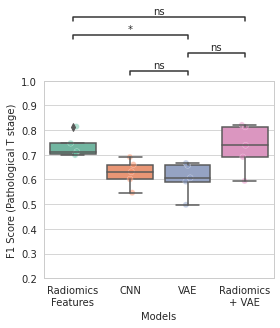

<AxesSubplot:xlabel='Models', ylabel='F1 Score (Pathological T stage)'>

In [39]:
box_pairs = [("VAE", "CNN"), 
                            ("VAE", "Radiomics\nFeatures"), 
                            ("Radiomics\n+ VAE", "VAE"), 
                            ("Radiomics\n+ VAE", "Radiomics\nFeatures")]
vis_result_boxplot(data, box_pairs=box_pairs, 
                        ylim=(0.2, 1),
    save_path=f"/labs/gevaertlab/users/yyhhli/code/vae/EDA/downstream_tasks/vis_results/boxplot.baseline_w_combined_{label_name}.pdf", 
    xlabel="Models", ylabel=f"F1 Score ({label_name})")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.651e-01
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.551e-01 stat=-2.469e+00
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=3.031e-02 stat=3.544e+00
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=7.774e-02
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_Pathological T stage.jpeg


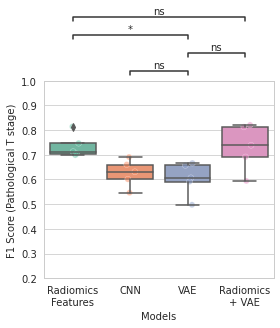

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.890e-01
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.890e-01
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.915e-01 stat=2.334e+00
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=2.630e-01 stat=2.130e+00
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_Pathological N stage.jpeg


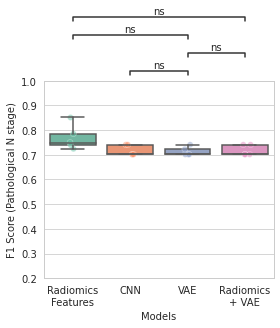

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.786e-02
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=9.778e-01 stat=-1.256e+00
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=3.922e-01 stat=1.872e+00
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.691e-01
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_AJCC Staging (Version 7).jpeg


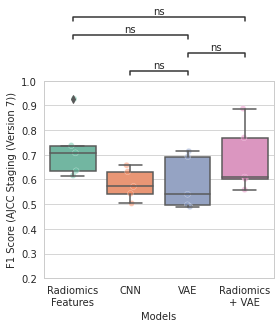

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=7.081e-01 stat=1.480e+00
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=8.432e-01 stat=-1.360e+00
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=5.032e-02 stat=3.202e+00
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=9.386e-02 stat=2.793e+00
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_Histopathological Grade.jpeg


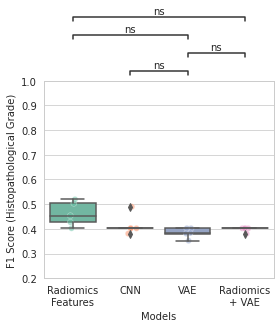

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=0.000e+00
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=0.000e+00
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.412e-01
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.412e-01
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_Lymphovascular invasion.jpeg


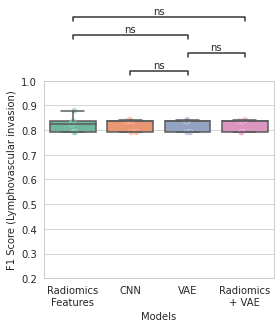

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.740e-01
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.052e-03
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=8.707e-01
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.861e-01
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_EGFR mutation status.jpeg


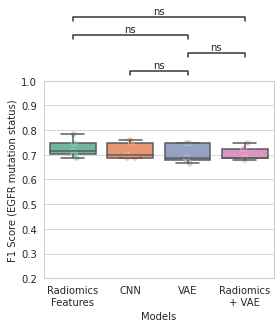

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.444e-01
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.803e-01
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.047e-01
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.964e-01
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_KRAS mutation status.jpeg


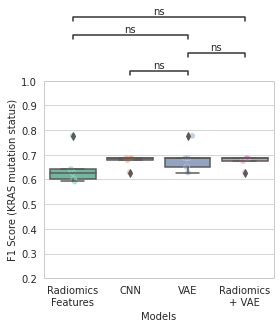

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CNN v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=0.000e+00
VAE v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=0.000e+00
Radiomics
Features v.s. VAE: t-test independent samples with Bonferroni correction, P_val=1.696e-01 stat=2.412e+00
Radiomics
Features v.s. Radiomics
+ VAE: t-test independent samples with Bonferroni correction, P_val=1.696e-01 stat=2.412e+00
saved to /labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_Pleural invasion (elastic, visceral, or parietal).jpeg


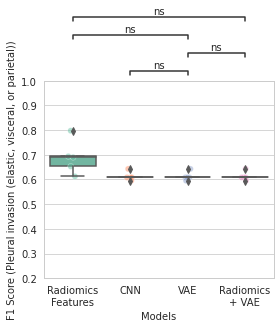

In [41]:
for label in label_list:
    label_name = label().name
    vae_label_name = label.__name__.split("Label")[1]
    # if vae_label_name == "StfRGLymphInvasion":
    #     vae_label_name = "StfLymphInvasion"
    # if vae_label_name == "StfRGPleuralInvasion":
    #     vae_label_name = "StfPleuralInvasion"
    pyra_metrics = pd.read_csv(osp.join(pyradiomics_result, f"results_xgboost_{label_name}.csv"))
    cnn_metrics = pd.DataFrame(read_json(osp.join(cnn_result, f"{label_name}.json")))
    vae_metrics = read_json(osp.join(vae_result_dir, f"{vae_label_name}.cv_result_dict.json"))["xgboost"]
    combined_metrics = pd.DataFrame(read_json(osp.join(combined_result, f"{label_name}_results.json")))
    data = pd.DataFrame({"Radiomics\nFeatures": pyra_metrics["F1"], "CNN": cnn_metrics["F1"], "VAE": vae_metrics["F1"], "Radiomics\n+ VAE": combined_metrics["F1"]})
    vis_result_boxplot(data, save_path=f"/labs/gevaertlab/users/yyhhli/code/vae/EDA/baselines/vis_results/boxplot.baseline_w_combined_{label_name}.jpeg", 
                    xlabel="Models", ylabel=f"F1 Score ({label_name})", 
                    box_pairs=box_pairs, ylim=(0.2, 1),)